In [1]:
%load_ext autoreload
%autoreload 2

Look for the RiverObs test data es either an environment variable or in the default directory location.

In [2]:
import os
from os.path import exists
def find_riverobs_test_data_dir():
    """Fin the location of the test data root directory"""
    
    if 'RIVEROBS_TESTDATA_DIR' in os.environ:
        test_data_dir = os.environ('RIVEROBS_TESTDATA_DIR')
    else: # try the default location
        test_data_dir = '../../../RiverObsTestData'
        
    if not exists(test_data_dir):
        print('You must either set the environment variable RIVEROBS_TESTDATA_DIR')
        print('or locate the test data directory at ../../../RiverObsTestData')
        raise Exception('Test data directory not found.')
        
    return test_data_dir

data_dir = find_riverobs_test_data_dir()
data_dir

'../../../RiverObsTestData'

In [3]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from os.path import join
from SWOTRiver import SWOTL2

/Users/erodrigu/anaconda/envs/RiverObs/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Test the v0 L2 Data

In [5]:
l2_file = join(data_dir,'L2','L2v0','simulated_sacramento_swot_test_data_v0.nc')
assert exists(l2_file)

In [6]:
height_kwd = 'water_height'
l2 = SWOTL2(l2_file)

Cant Find range_index, or azimuth_index variables, assuming 2D-image image coordinates (like from a gdem)


In [7]:
# Print the contents of the L2A file

for var in l2.nc.variables.keys():
    print(var)

height
no_layover_classification
no_layover_latitude
no_layover_longitude
water_height


Show the heights in lat/lon and X,Y coordinates:

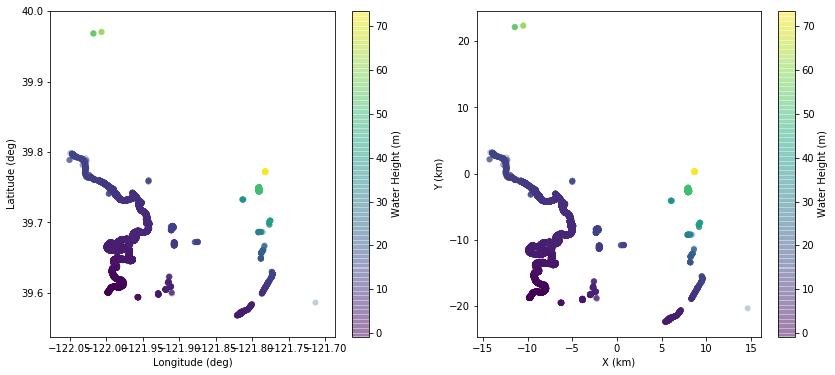

In [8]:
figsize(14,6)
plt.subplot(1,2,1)
plt.scatter(l2.lon,l2.lat,c=l2.get(height_kwd),edgecolor='none',alpha=0.3)
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.colorbar(label='Water Height (m)');
plt.subplot(1,2,2)
plt.scatter(l2.x/1.e3,l2.y/1.e3,c=l2.get(height_kwd),edgecolor='none',alpha=0.3)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.colorbar(label='Water Height (m)');

# Pixel cloud data v1

In [9]:
l2_file = join(data_dir,'L2','L2v1','swot_heights_ohio_example_v1.Multilook_L2PIXC.nc')
assert exists(l2_file)

In [10]:
lonmin =  -83 
latmin =  38
lonmax =  -82
latmax =  39
bounding_box = lonmin,latmin,lonmax,latmax

# The list of classes to consider for potential inundation.
# The truth classes are [1], if no_layover_classification' is used.
# If estimated classification is used, the choice depends on whether
# use_fractional_inundation is set.
# If it is not set, either [3,4] or [4] should be used.
# If it is set, [2,3,4] or [3,4] should be used.
class_list = [2,3,4,5]

lat_kwd = 'latitude_medium'
lon_kwd = 'longitude_medium'
class_kwd = 'classification'
height_kwd = 'height_medium'

l2 = SWOTL2(l2_file,bounding_box=bounding_box,
            class_list=class_list,
            lat_kwd=lat_kwd,lon_kwd=lon_kwd,class_kwd=class_kwd)

In [11]:
# Print the contents of the L2A file

for var in l2.nc.variables.keys():
    print(var)

azimuth_index
range_index
classification
continuous_classification
reference_layover_flag
reference_layover_height_error
pixel_area
latitude_medium
longitude_medium
height_medium
cross_track_medium
look_unit_x_medium
look_unit_y_medium
look_unit_z_medium
dlook_dphase_x_medium
dlook_dphase_y_medium
dlook_dphase_z_medium
dheight_dphase_medium
dheight_droll_medium
dheight_dbaseline_medium
dheight_drange_medium
dphase_medium
delta_x_medium
delta_y_medium
delta_z_medium
latitude_welldone
longitude_welldone
height_welldone
cross_track_welldone
look_unit_x_welldone
look_unit_y_welldone
look_unit_z_welldone
dlook_dphase_x_welldone
dlook_dphase_y_welldone
dlook_dphase_z_welldone
dheight_dphase_welldone
dheight_droll_welldone
dheight_dbaseline_welldone
dheight_drange_welldone
dphase_welldone
delta_x_welldone
delta_y_welldone
delta_z_welldone
ifgram_real
ifgram_imag
power_left
power_right
coherent_power
num_looks
height_instrument_error
wet_tropo_error


Show the heights in lat/lon and X,Y coordinates:

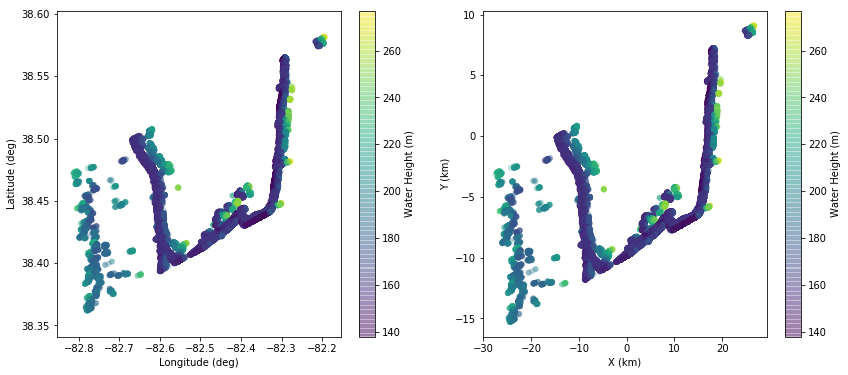

In [12]:
figsize(14,6)
plt.subplot(1,2,1)
plt.scatter(l2.lon,l2.lat,c=l2.get(height_kwd),edgecolor='none',alpha=0.3)
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.colorbar(label='Water Height (m)');
plt.subplot(1,2,2)
plt.scatter(l2.x/1.e3,l2.y/1.e3,c=l2.get(height_kwd),edgecolor='none',alpha=0.3)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.colorbar(label='Water Height (m)');

# Read GDEM data

In [13]:
l2_file = join(data_dir,'L2','L2v1','ohio_gdem_example_v1.nc')
assert exists(l2_file)

In [14]:
lonmin =  -83 
latmin =  38
lonmax =  -82
latmax =  39
bounding_box = lonmin,latmin,lonmax,latmax

lat_kwd = 'latitude'
lon_kwd = 'longitude'
class_kwd = 'landtype'
height_kwd = 'elevation'

class_list = [1,]

l2 = SWOTL2(l2_file,bounding_box=bounding_box,
            class_list=class_list,
            lat_kwd=lat_kwd,lon_kwd=lon_kwd,class_kwd=class_kwd)

Cant Find range_index, or azimuth_index variables, assuming 2D-image image coordinates (like from a gdem)


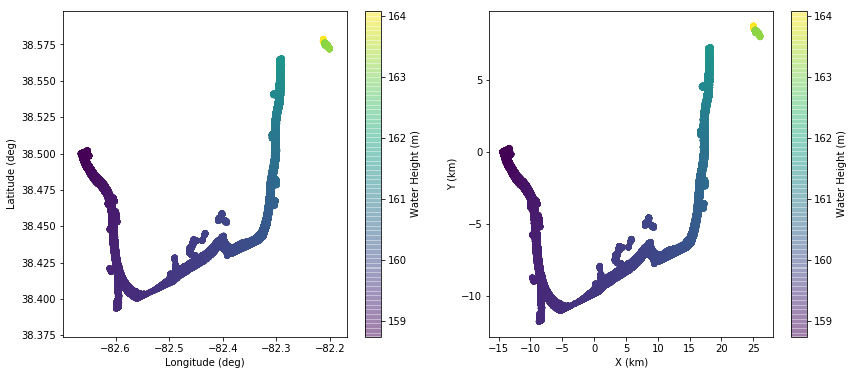

In [15]:
figsize(14,6)
plt.subplot(1,2,1)
plt.scatter(l2.lon,l2.lat,c=l2.get(height_kwd),edgecolor='none',alpha=0.3)
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.colorbar(label='Water Height (m)');
plt.subplot(1,2,2)
plt.scatter(l2.x/1.e3,l2.y/1.e3,c=l2.get(height_kwd),edgecolor='none',alpha=0.3)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.colorbar(label='Water Height (m)');